In [ ]:

# Murphy Campbell
# email: murphybcampbell@googlemail.com

# TTA Data Academy Home Learning: Session: 26 Jan 2022

# Reference: 

# https://www.rdocumentation.org/packages/ggradar/versions/0.2
# https://r-charts.com/flow/ggalluvial/#color
# https://rkabacoff.github.io/datavis/Other.html#radar-charts
#

Load libraries

In [127]:
library(tidyverse)

In [128]:
library(ggplot2)

Installing ggradar package

In [129]:
devtools::install_github("ricardo-bion/ggradar",dependencies = TRUE) 
                          


Skipping install of 'ggradar' from a github remote, the SHA1 (63e5cefc) has not changed since last install.
  Use `force = TRUE` to force installation



In [130]:
install.packages('ggalluvial')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Libraries

In [131]:
library(ggradar)

In [132]:
library(scales)
library(dplyr)

In [133]:
library(ggalluvial)

In [134]:
library(dplyr)

In [136]:
set.seed(13)

### Visualization on the mtcars data set

In [ ]:
# Setup dataframe and selecting first five car manufacturers with head(5) function

In [137]:

mtcars_radar <- mtcars %>% 
  as_tibble(rownames = "group") %>% 
  mutate_at(vars(-group), rescale) %>% 
  head(5) %>% 
  select(1:10)

In [138]:
str(mtcars_radar)

tibble [5 × 10] (S3: tbl_df/tbl/data.frame)
 $ group: chr [1:5] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num [1:5] 0.451 0.451 0.528 0.468 0.353
 $ cyl  : num [1:5] 0.5 0.5 0 0.5 1
 $ disp : num [1:5] 0.222 0.222 0.092 0.466 0.721
 $ hp   : num [1:5] 0.205 0.205 0.145 0.205 0.435
 $ drat : num [1:5] 0.525 0.525 0.502 0.147 0.18
 $ wt   : num [1:5] 0.283 0.348 0.206 0.435 0.493
 $ qsec : num [1:5] 0.233 0.3 0.489 0.588 0.3
 $ vs   : num [1:5] 0 0 1 1 0
 $ am   : num [1:5] 1 1 1 0 0


In [140]:
summary(mtcars_radar)

    group                mpg              cyl           disp        
 Length:5           Min.   :0.3532   Min.   :0.0   Min.   :0.09204  
 Class :character   1st Qu.:0.4511   1st Qu.:0.5   1st Qu.:0.22175  
 Mode  :character   Median :0.4511   Median :0.5   Median :0.22175  
                    Mean   :0.4502   Mean   :0.5   Mean   :0.34447  
                    3rd Qu.:0.4681   3rd Qu.:0.5   3rd Qu.:0.46620  
                    Max.   :0.5277   Max.   :1.0   Max.   :0.72063  
       hp              drat              wt              qsec       
 Min.   :0.1449   Min.   :0.1475   Min.   :0.2063   Min.   :0.2333  
 1st Qu.:0.2049   1st Qu.:0.1797   1st Qu.:0.2830   1st Qu.:0.3000  
 Median :0.2049   Median :0.5023   Median :0.3482   Median :0.3000  
 Mean   :0.2389   Mean   :0.3760   Mean   :0.3531   Mean   :0.3821  
 3rd Qu.:0.2049   3rd Qu.:0.5253   3rd Qu.:0.4352   3rd Qu.:0.4893  
 Max.   :0.4346   Max.   :0.5253   Max.   :0.4927   Max.   :0.5881  
       vs            am     
 Min.

In [ ]:
head(mtcars_radar)

group,mpg,cyl,disp,hp,drat,wt,qsec,vs,am
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,0.4510638,0.5,0.2217511,0.2049470,0.5253456,0.2830478,0.2333333,0,1
Mazda RX4 Wag,0.4510638,0.5,0.2217511,0.2049470,0.5253456,0.3482485,0.3000000,0,1
Datsun 710,0.5276596,0.0,0.0920429,0.1448763,0.5023041,0.2063411,0.4892857,1,1
Hornet 4 Drive,0.4680851,0.5,0.4662010,0.2049470,0.1474654,0.4351828,0.5880952,1,0
Hornet Sportabout,0.3531915,1.0,0.7206286,0.4346290,0.1797235,0.4927129,0.3000000,0,0


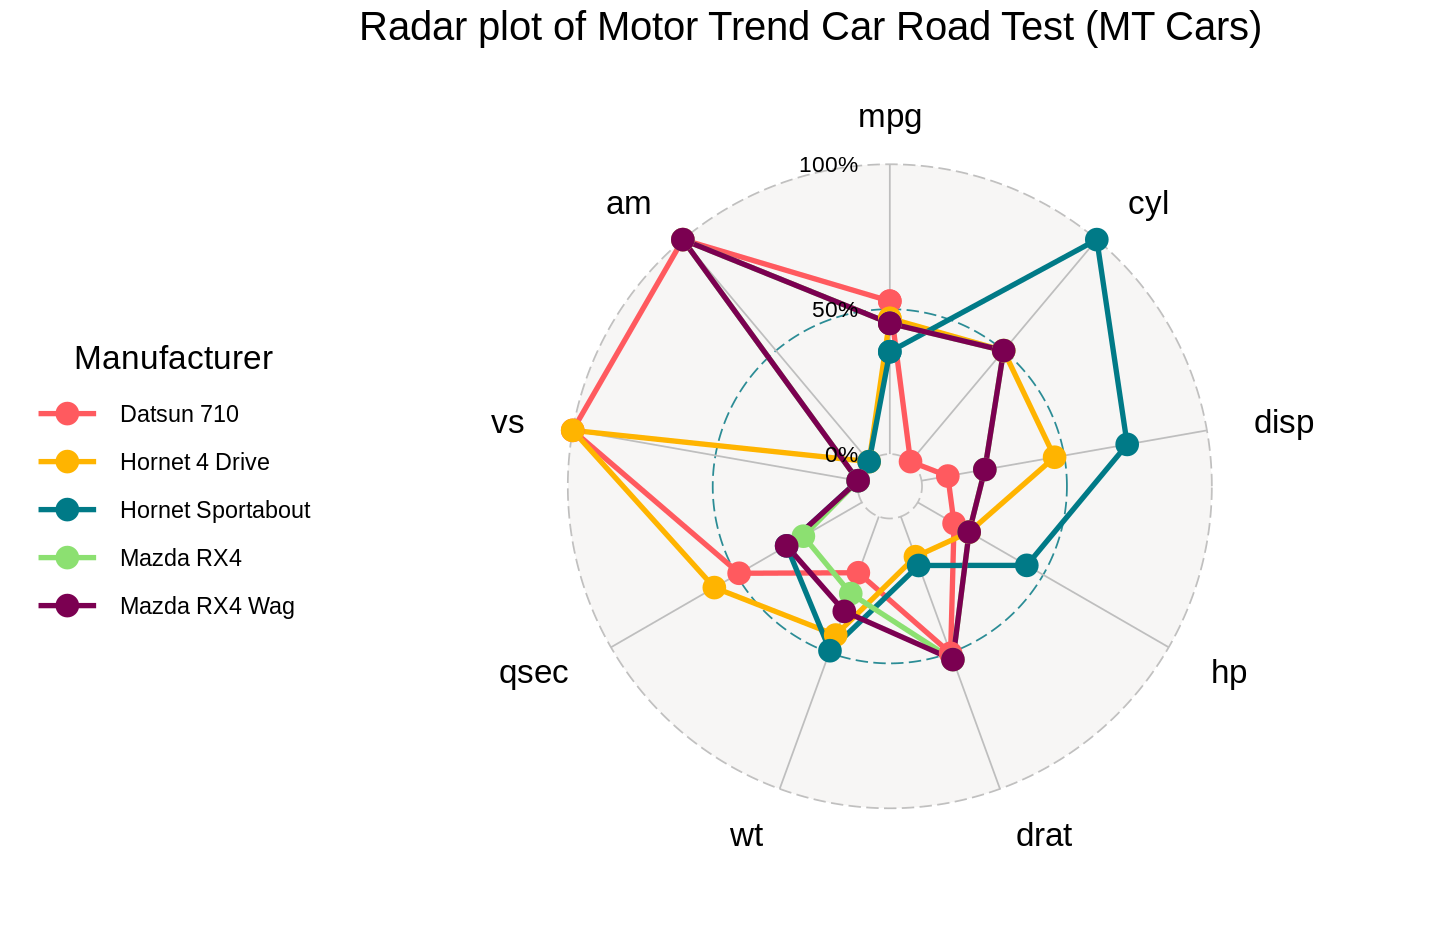

In [153]:
options(repr.plot.width = 12, repr.plot.height = 7.75)
ggradar(mtcars_radar,plot.title = 'Radar plot of Motor Trend Car Road Test (MT Cars)',axis.label.size = 7,legend.title = 'Manufacturer')

Radar plot of the first five car manufactures, Hornet Sportabout car has the largest cylinders, Datsun 710, Hornet 4 Drive have straight cylinder engines (vs=1),the others are V-cylinder engines.

Hornet Sportabout and Hornet 4 Drive have automatic transmission, the others are manual transmission,
Hornet Sportabout is the heaviest car, and has the highest horse power(hp) rating.

Description:

mpg:	Miles/(US) gallon
cyl:	Number of cylinders
disp:	Displacement (cu.in.)
hp:	Gross horsepower
drat:	Rear axle ratio
wt:	Weight (1000 lbs)
qsec:	1/4 mile time
vs:	Engine (0 = V-shaped, 1 = straight)
am:	Transmission (0 = automatic, 1 = manual)
gear:	Number of forward gears

### Visualization on the Titanic data set

In [ ]:
titanic_df <- data.frame(Titanic)

In [ ]:
summary(titanic_df)

  Class       Sex        Age     Survived      Freq       
 1st :8   Male  :16   Child:16   No :16   Min.   :  0.00  
 2nd :8   Female:16   Adult:16   Yes:16   1st Qu.:  0.75  
 3rd :8                                   Median : 13.50  
 Crew:8                                   Mean   : 68.78  
                                          3rd Qu.: 77.00  
                                          Max.   :670.00  

In [141]:
# convert Survived feature to a factor with levels Yes, No

titanic_A_df <- titanic_df %>%
  group_by(Class, Sex, Survived) %>%
  count()

titanic_A_df$Survived <- factor(titanic_A_df$Survived, 
                                 levels = c("Yes", "No"))

str(titanic_A_df)

grouped_df [16 × 4] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "Male","Female": 1 1 2 2 1 1 2 2 1 1 ...
 $ Survived: Factor w/ 2 levels "Yes","No": 2 1 2 1 2 1 2 1 2 1 ...
 $ n       : int [1:16] 2 2 2 2 2 2 2 2 2 2 ...
 - attr(*, "groups")= tibble [16 × 4] (S3: tbl_df/tbl/data.frame)
  ..$ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 1 1 1 1 2 2 2 2 3 3 ...
  ..$ Sex     : Factor w/ 2 levels "Male","Female": 1 1 2 2 1 1 2 2 1 1 ...
  ..$ Survived: Factor w/ 2 levels "Yes","No": 1 2 1 2 1 2 1 2 1 2 ...
  ..$ .rows   : list<int> [1:16] 
  .. ..$ : int 2
  .. ..$ : int 1
  .. ..$ : int 4
  .. ..$ : int 3
  .. ..$ : int 6
  .. ..$ : int 5
  .. ..$ : int 8
  .. ..$ : int 7
  .. ..$ : int 10
  .. ..$ : int 9
  .. ..$ : int 12
  .. ..$ : int 11
  .. ..$ : int 14
  .. ..$ : int 13
  .. ..$ : int 16
  .. ..$ : int 15
  .. ..@ ptype: int(0) 
  ..- attr(*, ".drop")= logi TRUE


Creating an Alluvium plot of the Titanic data set

In [ ]:
# set Colours
colors <- hcl.colors(2, 'Blue-Red')

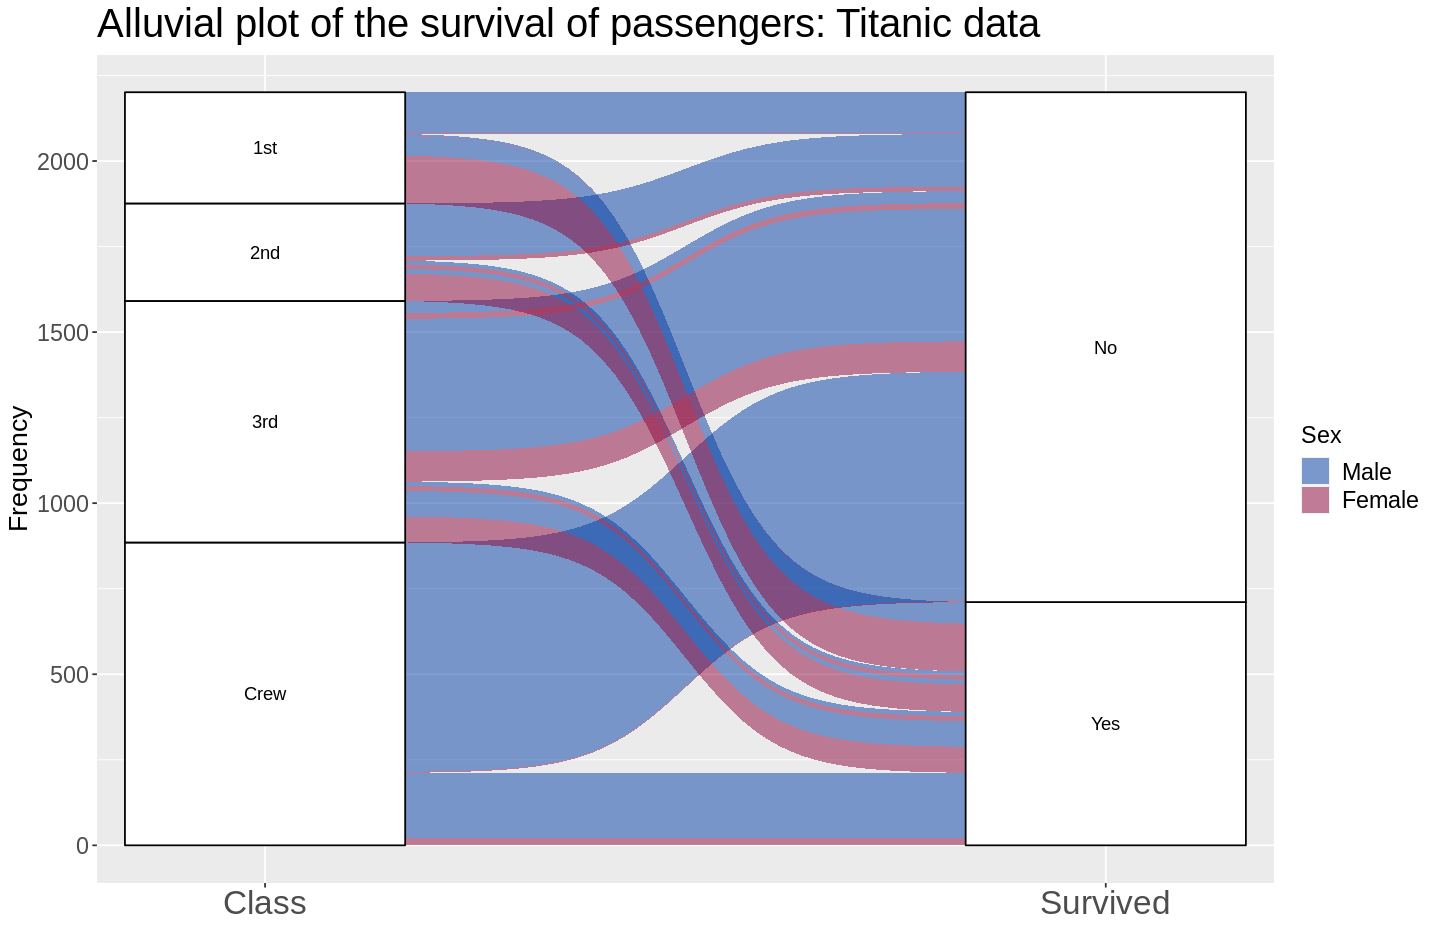

In [157]:
ggplot(titanic_df,
       aes(axis1 = Class, axis2 = Survived,
           y = Freq)) +
  scale_x_discrete(limits = c("Class", "Survived"), expand = c(.1, .1)) +
  geom_alluvium(aes(fill = Sex), curve_type = "sigmoid") +
  geom_stratum() +
  geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
  labs(title = "Alluvial plot of the survival of passengers: Titanic data", y = "Frequency") +
  scale_fill_manual(values = colors) +     
  theme(axis.text.x.bottom = element_text(size = 20))  +
  theme(axis.text.y.left = element_text(size = 14)) +
  theme(plot.title = element_text(size = 24)) +
  theme(legend.title = element_text(size = 14)) +
  theme(legend.text = element_text(size = 14)) + 
  theme(axis.title.y.left = element_text(size = 16)) 
  
  


### From the alluvial Titanic passenger plot, shows that the fate of death for female passengers is very small compared to male passengers.

### Nearly one half of the female passengers from the first class survived, followed by the second and third class female passengers. Over one half of the male first class passengers managed to get into a life boat and survived, followed by the second class, with about one fifth of the third class. 

### Nearly all of the crew perished along with the majority of the third and second class male passengers.  